# Project1 : Mercedes Benz Greener Manufacturing

## DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

### Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

### Following actions should be performed:

- If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
- Check for null and unique values for test and train sets.
- Apply label encoder.
- Perform dimensionality reduction.
- Predict your test_df values using XGBoost.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the data

In [2]:
#importing train_data
train_data=pd.read_csv("train.csv")
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.shape

(4209, 378)

In [6]:
#importing test_data
test_data=pd.read_csv("test.csv")
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
test_data.shape

(4209, 377)

In [8]:
#Checking the data type of train_data
train_data.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [9]:
#information about train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [10]:
#printing categorical features in the dataset
print('Categorical Features : ')
for i in train_data.columns:
    if train_data[i].dtypes=='object':
        print(i) 

Categorical Features : 
X0
X1
X2
X3
X4
X5
X6
X8


In [11]:
## Removing the columns 'ID' and 'Y' from the data as they are not so important for learning
X_train=train_data.drop(['ID', 'y'],axis=1)
X_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train.shape

(4209, 376)

In [13]:
#Storing the target feature in y_target
y_target=train_data['y']
y_target.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [14]:
y_target.shape

(4209,)

In [15]:
X_test=test_data.drop('ID',axis=1)
X_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
X_test.shape

(4209, 376)

### If for any columns, the variance is equal to zero, then you need to remove those variable(s).

In [17]:
from sklearn.feature_selection import VarianceThreshold

In [18]:
#separting numerical features to apply VarianceThreshold
X_train_numerical_features=X_train.iloc[:,8:]
X_train_numerical_features.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Lets apply the VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train_numerical_features)

VarianceThreshold(threshold=0)

In [20]:
#Finding the non-constant features
print('Number of non-constant features : ',sum(var_thres.get_support()))
# lets find the length of the non-constant feature
print('Non-constant features : ',X_train_numerical_features.columns[var_thres.get_support()])

Number of non-constant features :  356
Non-constant features :  Index(['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=356)


In [21]:
constant_columns=[column for column in X_train_numerical_features.columns
                  if column not in X_train_numerical_features.columns[var_thres.get_support()]]

print(len(constant_columns))

12


In [22]:
for column in constant_columns:
    print(column)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347


In [23]:
X_train_numerical_features.drop(constant_columns,axis=1,inplace=True)

In [24]:
#Displaying after removing the columns having zero variance
X_train_numerical_features.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Apply label encoder

In [25]:
#separating categorical features to apply label encoder
X_train_categorical_features=X_train.iloc[:,0:8]
X_train_categorical_features.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


#### Checking unique values 

In [26]:
X_train_categorical_features.nunique()

X0    47
X1    27
X2    44
X3     7
X4     4
X5    29
X6    12
X8    25
dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [28]:
X_train_categorical_features=X_train_categorical_features.apply(LE.fit_transform)
X_train_categorical_features.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


In [29]:
Final_X_train=pd.concat([X_train_categorical_features,X_train_numerical_features],axis=1)
Final_X_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
Final_X_train.shape

(4209, 364)

### Now performing feature selection(removing columns(Variance=0) and label encoding on test data too

In [31]:
X_test_categorical_features=X_test.iloc[:,0:8]
X_test_categorical_features.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [32]:
X_test_categorical_features=X_test_categorical_features.apply(LE.fit_transform)
X_test_categorical_features.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12


In [33]:
X_test.drop(X_test.iloc[:,0:8],axis=1,inplace=True)

In [34]:
var_thres.transform(X_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
constant_columns=[column for column in X_test.columns
                  if column not in X_test.columns[var_thres.get_support()]]

print(len(constant_columns))

12


In [36]:
for column in constant_columns:
    print(column)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347


In [37]:
X_test.drop(constant_columns,axis=1,inplace=True)

In [38]:
X_test.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
Final_X_test=pd.concat([X_test_categorical_features,X_test],axis=1)
Final_X_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [40]:
Final_X_test.shape

(4209, 364)

### Check for null values in test and train sets.

In [41]:
def check_missing_values(df):
    if df.isnull().sum().any()==True:
        print("There are missing values in the data")
    else:
        print("There are no missing values in the data")  

In [42]:
check_missing_values(Final_X_train)

There are no missing values in the data


In [43]:
check_missing_values(Final_X_test)

There are no missing values in the data


### Perform dimensionality reduction

In [44]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)

In [45]:
pca.fit(Final_X_train)

PCA(n_components=0.95)

In [46]:
Final_X_train_transformed=pca.transform(Final_X_train)

In [47]:
Final_X_train_transformed.shape

(4209, 6)

In [48]:
Final_X_test_transformed=pca.transform(Final_X_test)

In [49]:
Final_X_test_transformed.shape

(4209, 6)

### Building model using xgboost on train data

In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [51]:
X_train,X_test,y_train,y_test= train_test_split(Final_X_train_transformed,y_target,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2946, 6)
(1263, 6)
(2946,)
(1263,)


##### Instantiating an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.

In [83]:
#XGBoost's hyperparameters tuning manually
xgbr = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.2,
                max_depth = 7, n_estimators = 30)

In [84]:
xgbr.fit(X_train,y_train)

[06:27:20] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=30, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [85]:
preds = xgbr.predict(X_test)
preds

array([ 94.87331,  99.44947, 104.36804, ..., 103.96149, 104.97268,
       100.10779], dtype=float32)

In [86]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 11.126096


After tuning the hyperparameters to meet minimum RMSE, RMSE turned out to be 11.12

In [87]:
print('r2_score: ',r2_score(y_test,preds))

r2_score:  0.3075736040113166


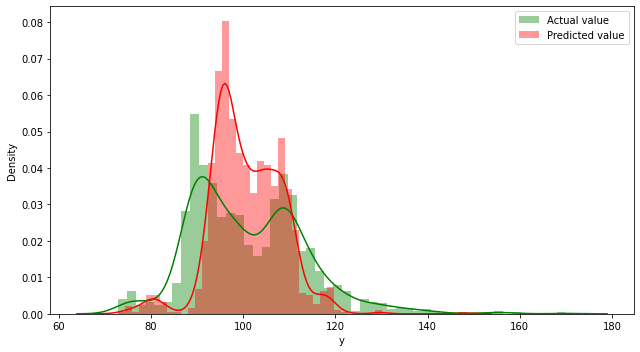

In [88]:
plt.figure(figsize=(9,5))

sns.distplot(y_test[y_test<200], color="green",bins=50, label="Actual value")
sns.distplot(preds[preds<200] , color="red",bins=50, label="Predicted value")
plt.legend()

plt.tight_layout()

### k-fold Cross Validation using XGBoost

In [89]:
data_dmatrix = xgb.DMatrix(Final_X_train_transformed,y_target)

params = {"objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.2,
                'max_depth': 7}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[06:27:46] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[06:27:46] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[06:27:46] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [90]:
#cv_results gives train and test RMSE metrics for each boosting round.
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,81.139155,0.038636,81.139109,0.094977
1,65.294093,0.049139,65.305331,0.103840
2,52.718800,0.032387,52.735636,0.145368
3,42.710735,0.041509,42.745107,0.146755
4,34.842483,0.029151,34.888869,0.176786
5,28.631352,0.033550,28.739218,0.230010
6,23.760027,0.070609,23.956226,0.283432
7,19.935802,0.140417,20.299477,0.268053
8,16.947908,0.160076,17.454299,0.245753
9,14.692608,0.143118,15.348115,0.304733


In [91]:
print((cv_results["test-rmse-mean"]).tail(1))

31    10.325395
Name: test-rmse-mean, dtype: float64


Hence, after using k-fold cross validation, we can see that our RMSE has reduced as compared to last time and came out to be around 10.32.

### Predict your test data values using XGBoost.

In [92]:
test_pred = xgbr.predict(Final_X_test_transformed)
test_pred

array([ 76.94139 , 100.37104 ,  96.46746 , ..., 103.469696, 107.447495,
        99.52947 ], dtype=float32)

### Pictorial representation showing comparison between the target for training data-set and predicted target for testing data-set.

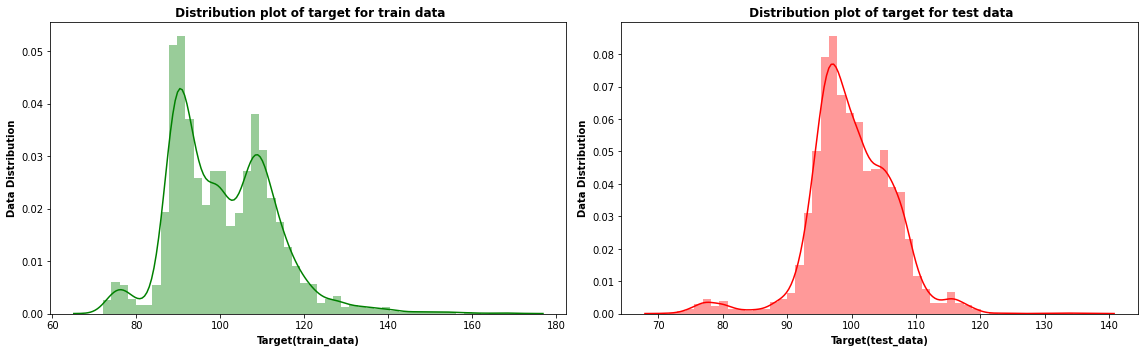

In [93]:
fig, ax = plt.subplots(1,2, figsize=(16,5))

train_plot = sns.distplot(y_target[y_target<200], bins=50, kde=True,color='green',ax=ax[0])
train_plot.set_xlabel('Target(train_data)', weight='bold', size=10)
train_plot.set_ylabel('Data Distribution', weight='bold', size=10)
train_plot.set_title(' Distribution plot of target for train data', weight='bold', size=12)

test_plot = sns.distplot(test_pred[test_pred<200], bins=50, kde=True,color='red',ax=ax[1])
test_plot.set_xlabel('Target(test_data)', weight='bold', size=10)
test_plot.set_ylabel('Data Distribution', weight='bold', size=10)
test_plot.set_title(' Distribution plot of target for test data', weight='bold', size=12)

plt.tight_layout()